<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr
%matplotlib inline
import statistics
from sklearn import preprocessing

import seaborn as sns

Загрузить датасет по url:


In [5]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

#### Посмотреть первые несколько рядов таблицы

In [6]:
df[:5]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [8]:
df['Freedom'].isnull().sum()

1

In [9]:
df['Positive affect'].isnull().sum()

1

#### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

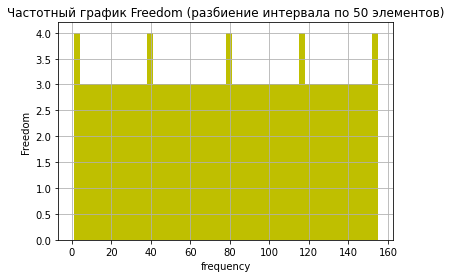

In [10]:
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='y')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

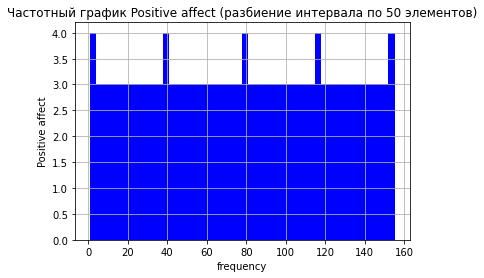

In [11]:
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Видим,что это равномерное распределение

#### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

#### Почему нельзя найти моду?

Нельзя найти моду,потому что каждое значение в столбце встречается только один раз,все значения различны
 
До этого проверили на пустые значения столбцы и обнаружили, что в каждом из них есть по 1 пустой строчке

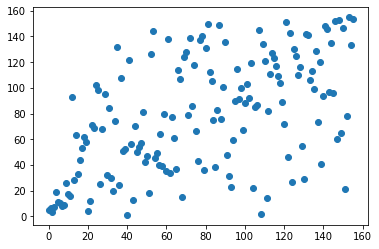

In [12]:
plt.scatter(df['Freedom'].index, df['Freedom'])
plt.show()

На графике видим большой разброс значений

Посчитаем статичтичечкие данные, удаляя строки, содержащие NaN с помощью dropna()

In [13]:
print('Медиана:', np.median(df['Freedom'].dropna()))
print('Математическое ожидание:', np.mean(df['Freedom'].dropna()))
print('Стандартное отклонение:', df['Freedom'].dropna().std())
print('Дисперсия:', df['Freedom'].var())
print('Минимум:', min(df['Freedom'].dropna()))
print('Максимум:', max(df['Freedom'].dropna()))
print('Размах:', df['Freedom'].max() - df['Freedom'].min())

Медиана: 78.0
Математическое ожидание: 78.0
Стандартное отклонение: 44.88875137492688
Дисперсия: 2015.0
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


#### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

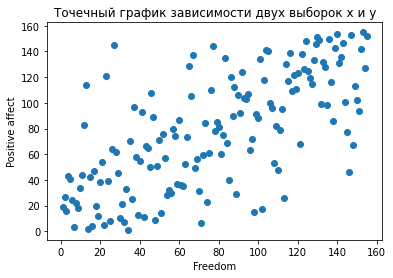

In [14]:
x = df['Freedom']
y = df['Positive affect']

plt.scatter(x, y)
plt.title('Точечный график зависимости двух выборок x и y')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [17]:
corr, p_value = pearsonr(df['Positive affect'].dropna(),
                         df['Freedom'].dropna())
print('Коэффицент корреляции =', corr)

Коэффицент корреляции = 0.6817698430601657


Коэффицент близок к 1, значит линейная связь между двумя величинами выше средней.

#### Нормализовать данные колонки Freedom (централизация + масштабирование)

In [18]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(df['Freedom'].values.reshape(-1, 1))

print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


#### Построить матрицу корреляций для всех колонок таблицы

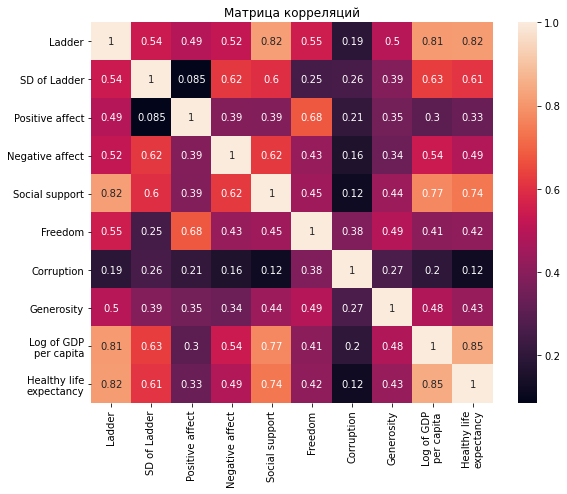

In [19]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

#### Загрузить таблицу цен на авокадо: 

In [20]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


#### Сделать частотный график колонки AveragePrice. Какое это распределение?

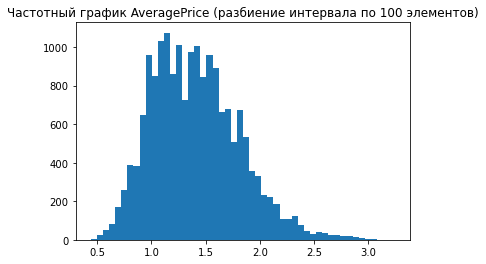

In [21]:
plt.hist(df['AveragePrice'],50)
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.show()

Здесь наблюдается нормальное распределение

#### Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

<AxesSubplot:>

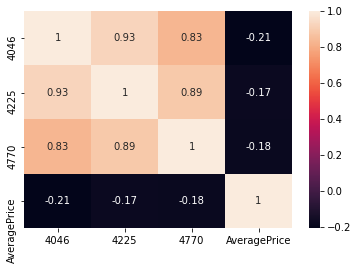

In [22]:
df = df[['4046', '4225', '4770', 'AveragePrice']]

sns.heatmap(df.corr(), annot=True)

У колонок 4046, 4225 и 4770 корреляция прямая, а в AveragePrice значения отрицательные, значит корреляция обратная, следовательно, при увеличении значений колонок средняя стоимость будет снижаться. 